In [1193]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import sklearn
%matplotlib inline
import warnings
from sklearn import linear_model
import sklearn.metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, f1_score

warnings.filterwarnings("ignore")

In [1194]:
# transfer the recomended amount of time to visit to numeric: getting the dataframe and returning the corectted df

def Rec_of_time_to_numeric(df):
    df_cpy = df.copy()
    new_col = []
    
    col = df_cpy['recomended_amount_time_to_visit']
    
    for i in col:
        try:
            f= re.findall("\d",i) 
            new_col.append(max(f))
        except:
            new_col.append(np.nan)
            continue
    new_col = pd.Series(new_col,dtype="float")        
    df_cpy=df_cpy.drop('recomended_amount_time_to_visit',axis=1)
    df_cpy['recomended_amount_time_to_visit_numeric'] = new_col
    
    return df_cpy
    

In [1195]:
# getting the dataframe and returning df with two tag cols and whitout tag_1 col;

def Split_the_tags(df):
    
    df_cpy=df.copy()
    tag1 =[]
    tag2=[]
    for i in df_cpy['tag_1']:
            try:
                h=re.findall(r"\w+[\s\w]+",i)
            except:
                tag1.append(np.nan)
                tag2.append(np.nan)
                continue

            tag1.append(h[0])
            try:
                tag2.append(h[1])
            except:
                tag2.append(np.nan)

    ser_t_1 = pd.Series(tag1)
    ser_t_2= pd.Series(tag2)
    df_cpy=df_cpy.drop('tag_1',axis=1)
    df_cpy['tag1'] = ser_t_1
    df_cpy['tag2'] = ser_t_2

    return df_cpy

In [1196]:
# chainging the "opening_houres" col to numeric, reciving df and returning the cureccted column:

def Total_opening_houres(df):
    df_cpy = df.copy()
    new_col = []
    col = df_cpy['opening_houres']
    patt_start_time = r"(\d+)"
    patt_end_time = r"-\s(\d+)"
    
    for i in col:
        try:
            
            start = re.search(patt_start_time,i)
            end = re.search(patt_end_time,i)
            start = int(start.group(1))
            end = int(end.group(1))
            end = end+12
            time = end-start
            new_col.append(time)
            
        except:
            new_col.append(np.nan)
            continue
    new_col = pd.Series(new_col,dtype="float")        
    df_cpy=df_cpy.drop('opening_houres',axis=1)
    df_cpy['opening_houres_numeric'] = new_col
    
    
    return df_cpy
    

In [1197]:
# extracting  the "distric_city" col to only district city, reciving df and returning the cureccted column:

def Corccted_destric_city(df,pattr):
    df_cpy = df.copy()
    new_col = []
    col = df_cpy['distric_city']
 
    for i in col:
        try:
            j = re.search(pattr,i)
            new_col.append(j.group(0))
            
        except:
            new_col.append(np.nan)
            continue
    new_col = pd.Series(new_col)        
    df_cpy=df_cpy.drop('distric_city',axis=1)
    df_cpy['distric_city_corrected'] = new_col
    
    
    return df_cpy
    

# data pre-processing

In [1198]:
# in this section i did some changes in the raw data so it can be easyer to show on the eda section:
## this part is for to extract the city from the adress, it.csv is a file from the web that contins a list of cities
# in itly i add to it the "|" (pipe) so i can use it as regex

cities = pd.read_csv("it.csv")
pattr = ""

for city in cities['city']:
    pattr += city + "|"
pattr = pattr[:-3]

In [1199]:
t = pd.read_csv("23K_data")
ds = t.copy()
ds= ds.drop('Unnamed: 0',axis=1)



In [1200]:
ds = Total_opening_houres(ds)
ds = Split_the_tags(ds)
ds = Rec_of_time_to_numeric(ds)
ds = Corccted_destric_city(ds,pattr)

# dropping duplicates and nans

In [1201]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23308 entries, 0 to 23307
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   site_name                                23260 non-null  object 
 1   total_reviewers                          23256 non-null  float64
 2   rank                                     23230 non-null  float64
 3   num_of_resturants_nearby                 20435 non-null  float64
 4   num_of_attractions_nearby                20357 non-null  float64
 5   opening_houres_numeric                   3023 non-null   float64
 6   tag1                                     23254 non-null  object 
 7   tag2                                     13884 non-null  object 
 8   recomended_amount_time_to_visit_numeric  11899 non-null  float64
 9   distric_city_corrected                   12196 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.8+ MB

In [1202]:
ds.drop_duplicates(inplace=True)

In [1203]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22111 entries, 0 to 23307
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   site_name                                22109 non-null  object 
 1   total_reviewers                          22105 non-null  float64
 2   rank                                     22080 non-null  float64
 3   num_of_resturants_nearby                 19448 non-null  float64
 4   num_of_attractions_nearby                19371 non-null  float64
 5   opening_houres_numeric                   2901 non-null   float64
 6   tag1                                     22103 non-null  object 
 7   tag2                                     13173 non-null  object 
 8   recomended_amount_time_to_visit_numeric  11269 non-null  float64
 9   distric_city_corrected                   11572 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.9+ MB

In [1204]:
# these are the thresholsd that i thought to be the minimum with i need to continue with the data 
# (less then this,the data wont mean anything)

ds.dropna(subset=['site_name','total_reviewers','rank','num_of_resturants_nearby'
                        ,'num_of_attractions_nearby','tag1'],inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19345 entries, 0 to 23307
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   site_name                                19345 non-null  object 
 1   total_reviewers                          19345 non-null  float64
 2   rank                                     19345 non-null  float64
 3   num_of_resturants_nearby                 19345 non-null  float64
 4   num_of_attractions_nearby                19345 non-null  float64
 5   opening_houres_numeric                   2629 non-null   float64
 6   tag1                                     19345 non-null  object 
 7   tag2                                     11699 non-null  object 
 8   recomended_amount_time_to_visit_numeric  10029 non-null  float64
 9   distric_city_corrected                   11528 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.6+ MB

# filling missing values(common an mean)

In [1205]:
# ds= ds.drop('Unnamed: 0',axis=1)
ds.describe()

,total_reviewers,rank,num_of_resturants_nearby,num_of_attractions_nearby,opening_houres_numeric,recomended_amount_time_to_visit_numeric
count,19345.000000,19345.000000,19345.000000,19345.000000,2629.000000,10029.000000
mean,237.726234,4.229310,270.837736,161.167847,10.557246,1.629574
std,2152.825038,0.555621,629.467278,235.672213,3.170728,0.770859
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,8.000000,4.000000,39.000000,49.000000,8.000000,1.000000
50%,28.000000,4.500000,97.000000,94.000000,10.000000,1.000000
75%,105.000000,4.500000,263.000000,181.000000,12.000000,2.000000
max,149077.000000,5.000000,7146.000000,2188.000000,22.000000,3.000000


<!-- filling the missing values using mean and mode values -->

In [1206]:
ds['opening_houres_numeric'] = ds.opening_houres_numeric.fillna(ds.opening_houres_numeric.mode()[0])
ds['distric_city_corrected'] = ds.distric_city_corrected.fillna(ds.distric_city_corrected.mode()[0])
ds['tag2'] = ds.tag2.fillna(ds.tag2.mode()[0])
ds['recomended_amount_time_to_visit_numeric'] = ds.recomended_amount_time_to_visit_numeric.fillna(
                                                ds.recomended_amount_time_to_visit_numeric.mode()[0])

In [1207]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19345 entries, 0 to 23307
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   site_name                                19345 non-null  object 
 1   total_reviewers                          19345 non-null  float64
 2   rank                                     19345 non-null  float64
 3   num_of_resturants_nearby                 19345 non-null  float64
 4   num_of_attractions_nearby                19345 non-null  float64
 5   opening_houres_numeric                   19345 non-null  float64
 6   tag1                                     19345 non-null  object 
 7   tag2                                     19345 non-null  object 
 8   recomended_amount_time_to_visit_numeric  19345 non-null  float64
 9   distric_city_corrected                   19345 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.6+ MB

# searching for outliers with box plot:

<AxesSubplot:xlabel='num_of_resturants_nearby'>

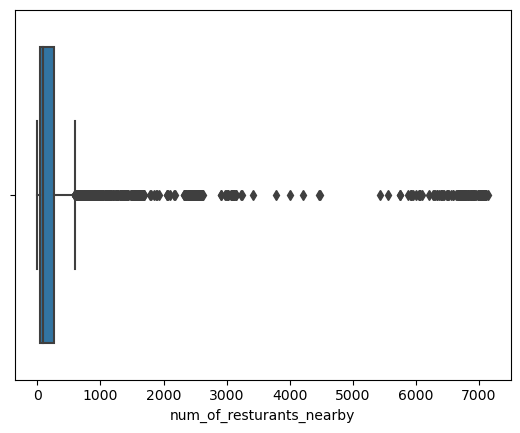

In [1208]:
sns.boxplot(ds.num_of_resturants_nearby)

<AxesSubplot:xlabel='num_of_attractions_nearby'>

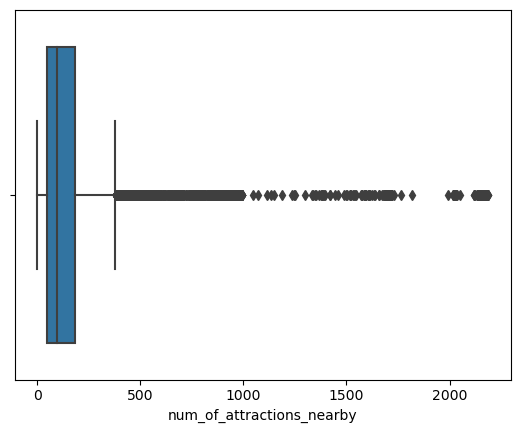

In [1209]:
sns.boxplot(ds.num_of_attractions_nearby)

<AxesSubplot:xlabel='opening_houres_numeric'>

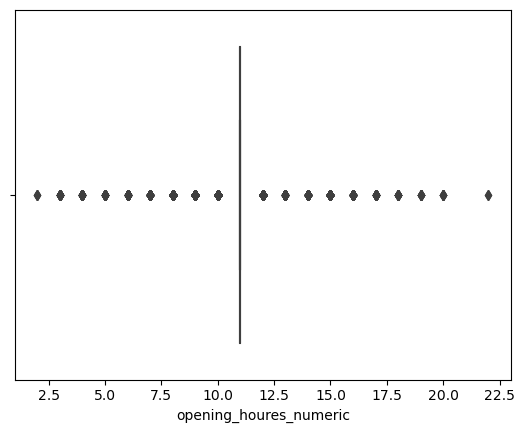

In [1210]:
sns.boxplot(ds.opening_houres_numeric)

<AxesSubplot:xlabel='recomended_amount_time_to_visit_numeric'>

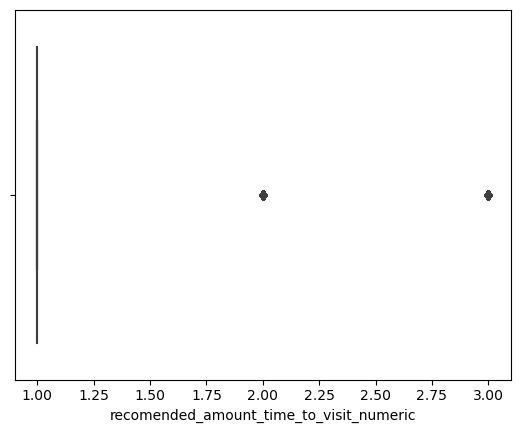

In [1211]:
sns.boxplot(ds.recomended_amount_time_to_visit_numeric)

<!-- Although we got many outliers in almost every data col, regarding the king of data that was scrapped it is normal and thou i kept it and didnt replaced the data  -->

<!-- transferring the data to labeled data: -->
    
<!--     total revewers to binned data -->
<!--     num of resturans and attractions to binned -->
    tag 1 & tag 2 to label encoding
    distric_city_corrected to encoded
    recomended_amount_time_to_visit_numeric to binned
    

In [1212]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19345 entries, 0 to 23307
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   site_name                                19345 non-null  object 
 1   total_reviewers                          19345 non-null  float64
 2   rank                                     19345 non-null  float64
 3   num_of_resturants_nearby                 19345 non-null  float64
 4   num_of_attractions_nearby                19345 non-null  float64
 5   opening_houres_numeric                   19345 non-null  float64
 6   tag1                                     19345 non-null  object 
 7   tag2                                     19345 non-null  object 
 8   recomended_amount_time_to_visit_numeric  19345 non-null  float64
 9   distric_city_corrected                   19345 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.6+ MB

In [1213]:
le = sklearn.preprocessing.LabelEncoder()

In [1214]:
# total reviewers binnet col to 10 bins:
total_reviewers_binned = ds['total_reviewers']
total_reviewers_binned = pd.cut(total_reviewers_binned,bins=10,labels=[1,2,3,4,5,6,7,8,9,10])
ds['total_reviewers_binned'] = total_reviewers_binned
ds = ds.drop('total_reviewers',axis=1)

In [1215]:
# num of resturants & attractions binned

In [1216]:
attractions_binned = ds['num_of_attractions_nearby']
attractions_binned= pd.cut(attractions_binned,bins=10,labels=[1,2,3,4,5,6,7,8,9,10])
ds['attractions_binned'] = attractions_binned
ds = ds.drop('num_of_attractions_nearby',axis=1)

# /////////////////////////////////////////////////////////////

resturants_bind = ds['num_of_resturants_nearby']
resturants_bind= pd.cut(resturants_bind,bins=10,labels=[1,2,3,4,5,6,7,8,9,10])
ds['resturants_bind'] = resturants_bind
ds = ds.drop('num_of_resturants_nearby',axis=1)


# \\\\\opening houres binned

opening_houres_binnd = ds['opening_houres_numeric']
opening_houres_binnd= pd.cut(opening_houres_binnd,bins=5,labels=[1,2,3,4,5])
ds['opening_houres_binnd'] = opening_houres_binnd
ds = ds.drop('opening_houres_numeric',axis=1)

In [1217]:
# recommended amount of time to visit binned:

recommended_visit_binned = ds['recomended_amount_time_to_visit_numeric']
resturants_bind= pd.cut(recommended_visit_binned,bins=5,labels=[1,2,3,4,5])
ds['recommended_visit_binned'] = recommended_visit_binned
ds = ds.drop('recomended_amount_time_to_visit_numeric',axis=1)


In [1218]:
le.fit(ds.tag1)
tag_1_encoded= le.transform(ds.tag1)
ds['tag_1_encoded'] = tag_1_encoded
ds = ds.drop('tag1',axis=1)

In [1219]:
le.fit(ds.tag2)
tag_2_encoded=le.transform(ds.tag2)
ds['tag_2_encoded'] = tag_2_encoded
ds = ds.drop('tag2',axis=1)

In [1220]:
le.fit(ds.distric_city_corrected)
destric_city_encoded=le.transform(ds.distric_city_corrected)
ds['destric_city_encoded'] = destric_city_encoded
ds = ds.drop('distric_city_corrected',axis=1)

In [1221]:
le.fit(ds['rank'])
rank_labeled=le.transform(ds['rank'])
ds['rank_labeled'] = rank_labeled
ds = ds.drop('rank',axis=1)


# saving two version of dataframe

In [1222]:
ds_with_all_new_params = ds.copy()

In [1168]:

ds_with_all_new_params.to_csv('ds_with_all_new_params')


In [1223]:
ds_without_all_old_params = ds.copy()
ds_without_all_old_params.to_csv('ds_without_all_old_params')

In [1224]:
ddf = pd.read_csv('ds_with_all_new_params')

In [1226]:
ddf= ddf.drop('Unnamed: 0',axis=1)

In [1355]:
ddf.columns

Index(['site_name', 'tag_1', 'distric_city', 'total_reviewers', 'rank',
       'num_of_resturants_nearby', 'num_of_attractions_nearby',
       'recomended_amount_time_to_visit', 'opening_houres',
       'opening_houres_numeric', 'tag1', 'tag2',
       'recomended_amount_time_to_visit_numeric', 'distric_city_corrected',
       'total_reviewers_binned', 'attractions_binned', 'resturants_bind',
       'opening_houres_binnd', 'recommended_visit_binned', 'tag_1_encoded',
       'tag_2_encoded', 'destric_city_encoded', 'rank_labeled'],
      dtype='object')

In [1389]:
cc=['distric_city', 'total_reviewers', 'rank',
       'num_of_resturants_nearby', 'num_of_attractions_nearby',
       'opening_houres_numeric', 'tag1', 'tag2',
       'recomended_amount_time_to_visit_numeric', 'distric_city_corrected',]
ddf[cc].corr()

,total_reviewers,rank,num_of_resturants_nearby,num_of_attractions_nearby,opening_houres_numeric,recomended_amount_time_to_visit_numeric
total_reviewers,1.000000,0.031290,0.384952,0.307198,-0.035796,0.067893
rank,0.031290,1.000000,-0.007748,-0.017906,-0.056060,0.066960
num_of_resturants_nearby,0.384952,-0.007748,1.000000,0.835643,-0.054151,0.006888
num_of_attractions_nearby,0.307198,-0.017906,0.835643,1.000000,-0.046049,-0.004678
opening_houres_numeric,-0.035796,-0.056060,-0.054151,-0.046049,1.000000,-0.021527
recomended_amount_time_to_visit_numeric,0.067893,0.066960,0.006888,-0.004678,-0.021527,1.000000


# basic eda presentation:

In [1227]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19345 entries, 0 to 23307
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   site_name                 19345 non-null  object  
 1   total_reviewers_binned    19345 non-null  category
 2   attractions_binned        19345 non-null  category
 3   resturants_bind           19345 non-null  category
 4   opening_houres_binnd      19345 non-null  category
 5   recommended_visit_binned  19345 non-null  float64 
 6   tag_1_encoded             19345 non-null  int64   
 7   tag_2_encoded             19345 non-null  int64   
 8   destric_city_encoded      19345 non-null  int64   
 9   rank_labeled              19345 non-null  int64   
dtypes: category(4), float64(1), int64(4), object(1)
memory usage: 1.1+ MB


In [1228]:
ddf['tag1'].describe()

count                   19345
unique                    175
top       Points of Interest 
freq                     2622
Name: tag1, dtype: object

In [1229]:
ddf['tag2'].describe()

count          19345
unique           164
top       Cathedrals
freq           10162
Name: tag2, dtype: object

In [1230]:
#crdit to project pro.com
from wordcloud import WordCloud, STOPWORDS

In [1231]:
 text = " ".join(cat for cat in ddf.distric_city_corrected)

In [1232]:
# Generate word cloud
word_cloud = WordCloud(
                        width=4000,
                        height=3000,
                        random_state=1,
                        background_color="white",
                        colormap="Pastel1",
                        collocations=False,
                        stopwords=None,).generate(text)
                         

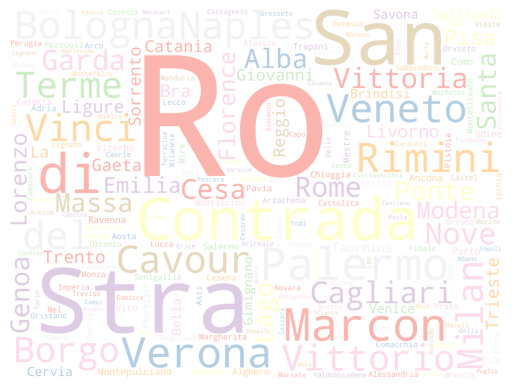

In [1233]:
 # Display the generated Word Cloud - finished
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
#the cities whith the most atracctions

Text(0, 0.5, 'the frequency of the rank')

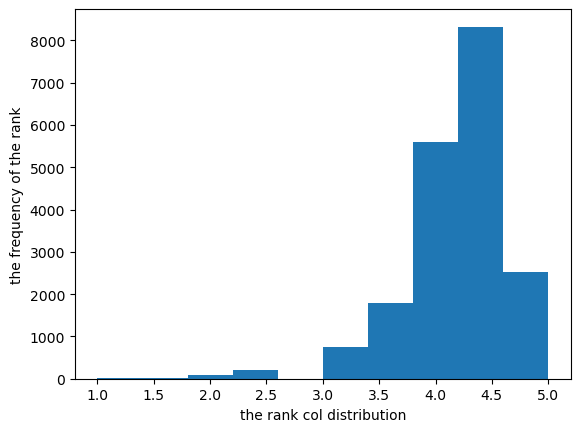

In [1347]:
#the rank col distribution
plt.hist(ddf['rank'])
plt.xlabel("the rank col distribution")
plt.ylabel("the frequency of the rank")

<AxesSubplot:xlabel='opening_houres_numeric', ylabel='Count'>

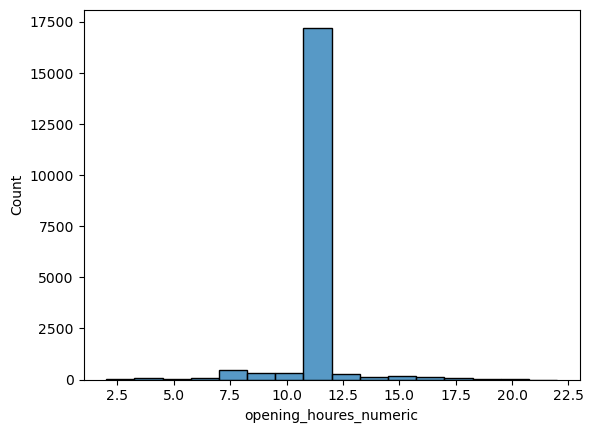

In [1237]:
# opening houres destribution
sns.histplot(ddf['opening_houres_numeric'])

<AxesSubplot:title={'center':'num of resturnts near the attaction'}, xlabel='rank', ylabel='(1 is the larger bin)'>

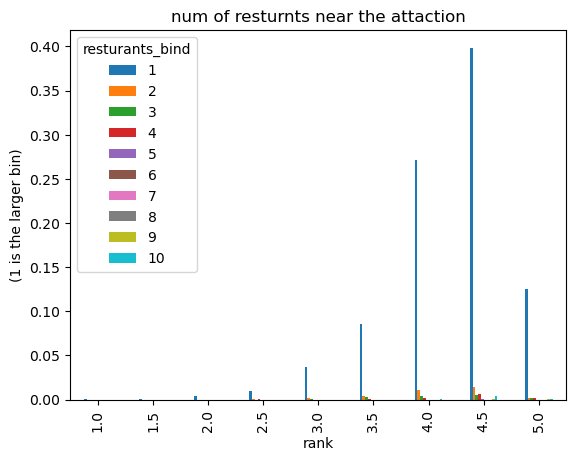

In [1390]:
# the connection between the rank and the num of resturnts
ct1 = pd.crosstab( ddf['rank'],ddf['resturants_bind'],normalize=True )
ct1.plot(kind='bar',ylabel="(1 is the larger bin)",title='num of resturnts near the attaction')

<AxesSubplot:xlabel='rank', ylabel='num_of_resturants_nearby'>

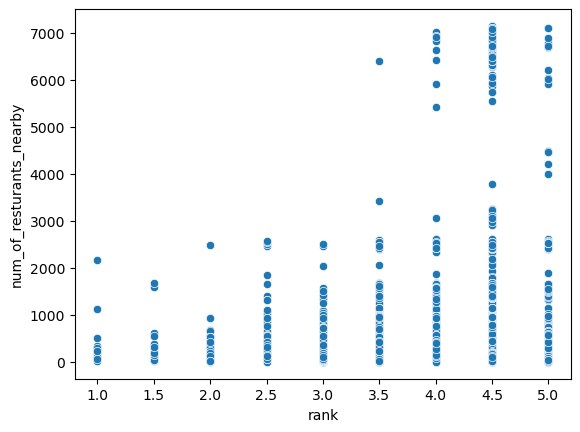

In [1354]:
sns.scatterplot(ddf['rank'],ddf['num_of_resturants_nearby'])

KeyError: ('num_of_attractions_nearby', 'num_of_resturants_nearby')

<AxesSubplot:xlabel='tag_1_encoded', ylabel='tag_2_encoded'>

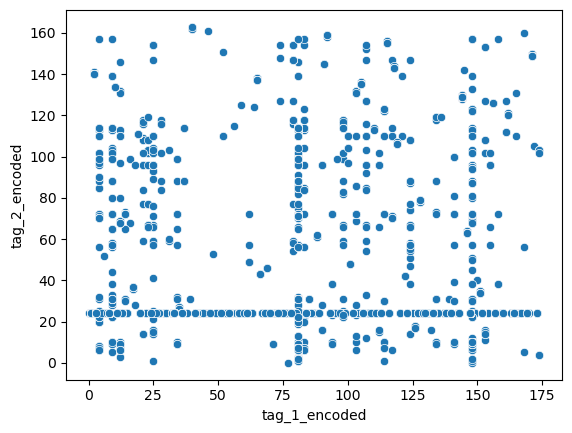

In [1357]:
sns.scatterplot(ddf['tag_1_encoded'],ddf['tag_2_encoded'])

<AxesSubplot:title={'center':'num of attractions near the main attaction'}, xlabel='rank', ylabel='(1 is the larger bin)'>

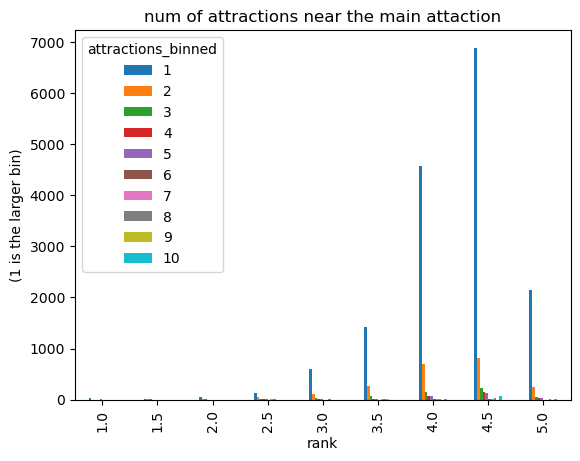

In [1243]:
# the correlation between the rank and the num of attractions
ct1 = pd.crosstab(ddf['rank'],ddf['attractions_binned'])
ct1.plot(kind='bar',ylabel="(1 is the larger bin)",title ="num of attractions near the main attaction")

<AxesSubplot:xlabel='rank', ylabel='num_of_attractions_nearby'>

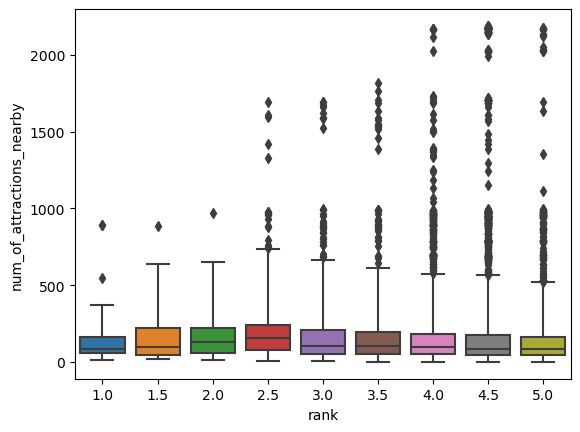

In [1245]:
sns.boxplot(ddf['rank'],ddf['num_of_attractions_nearby'],whis=3)

<AxesSubplot:xlabel='opening_houres_binnd', ylabel='num of attractions'>

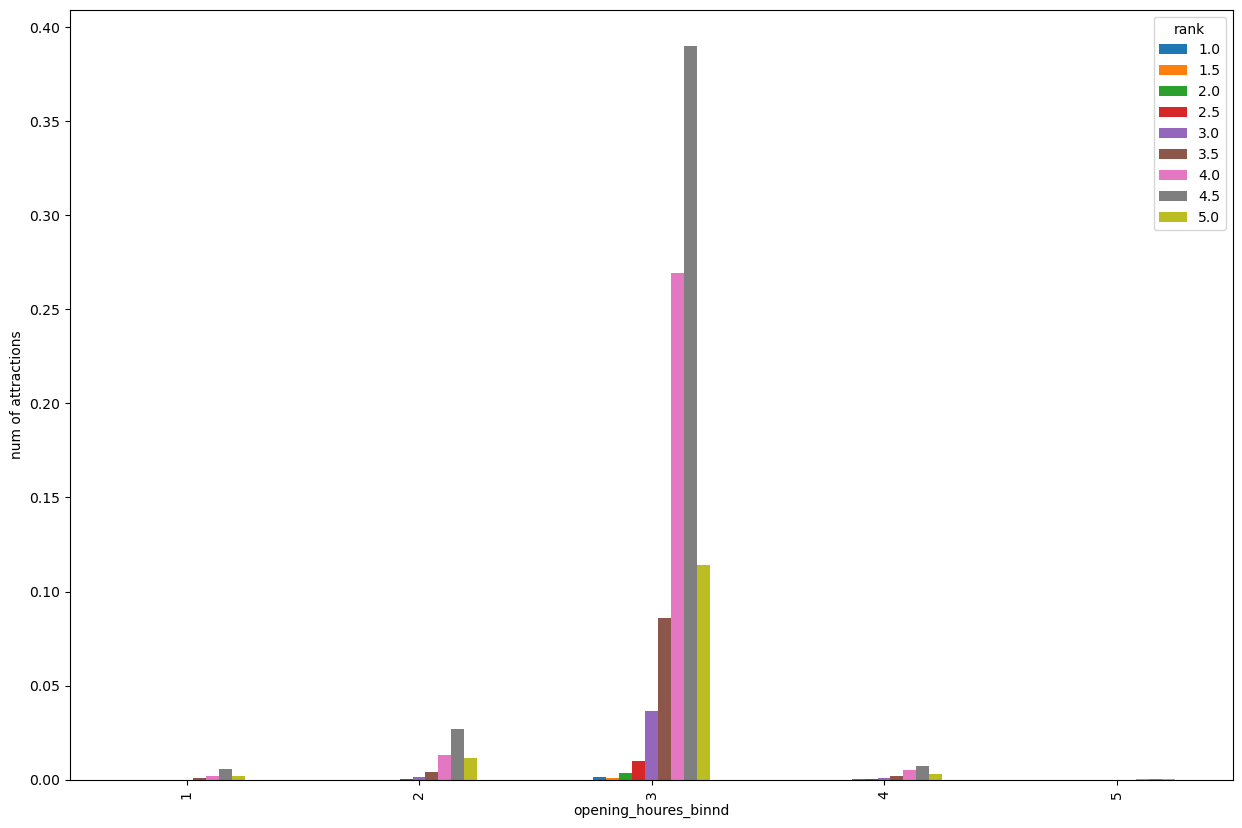

In [1391]:
# corellation between rank and opening houres (binned after pd.cut)

ct3 = pd.crosstab( ddf['opening_houres_binnd'] ,ddf['rank'],normalize='all')
ct3.plot(kind="bar",figsize=(15,10),ylabel = 'num of attractions')

# ML models - linear regression

In [ ]:
X = ds[['total_reviewers_binned','attractions_binned','resturants_bind','opening_houres_binnd','recommended_visit_binned','tag_1_encoded','tag_2_encoded','destric_city_encoded']]
y = ds['rank_labeled']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=40)


lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
r2 = r2_score(y_test,pred)


In [1247]:
from sklearn.model_selection import train_test_split
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

In [1314]:
# # data_frame = pd.read_csv('ds_without_all_old_params')
# # data_frame.drop('Unnamed: 0',axis=1)

# # ddf.columns

# X = ddf[['total_reviewers','num_of_attractions_nearby','num_of_resturants_nearby','opening_houres_numeric','tag_1_encoded']]
# y = ddf['rank_labeled']

In [1394]:
X = data_frame[['total_reviewers_binned','attractions_binned','resturants_bind',
                'recommended_visit_binned','opening_houres_binnd','tag_1_encoded'
                ,'tag_2_encoded','destric_city_encoded']]
y = data_frame['rank_labeled']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.40,random_state=40)


# using the knn model:

In [1395]:
clf= KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy score = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))
print('f1 score is: ',metrics.f1_score(y_true = y_test, y_pred = y_pred,average='weighted')) 
print('precision score', metrics.precision_score(y_true = y_test, y_pred = y_pred,average='weighted') )   

Accuracy score =  0.35202894804859136
f1 score is:  0.3417751346989359
precision score 0.34376970151850417


In [1396]:
#taken from the knn notebook
# using differant k values on the model

k_s=[]
train_accuracies=[]
test_accuracies=[]
for k in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred_train=clf.predict(X_train)
    y_pred=clf.predict(X_test)
    k_s.append(k)
    train_accuracies.append(metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
    test_accuracies.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

df=pd.DataFrame({"k":k_s,"test_accuracy":test_accuracies,'train_accuracies':train_accuracies})
df

,k,test_accuracy,train_accuracies
0,1,0.327216,0.696390
1,2,0.282890,0.517188
2,3,0.305118,0.510554
3,4,0.339106,0.501335
4,5,0.352029,0.491255
5,6,0.356035,0.480831
6,7,0.361851,0.477040
7,8,0.379039,0.486172
8,9,0.379685,0.481175
9,10,0.398553,0.483587


In [1397]:
# now i tried to use the grid search cross validation to find the best k:
parameters = {'n_neighbors':range(1,25) }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,cv=10,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(X_train, y_train)
print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)

best parameter set is: {'n_neighbors': 14}  and its score was 0.4084623837951825


# using the desicion tree model:

In [1398]:
dtree = tree.DecisionTreeClassifier()

In [1399]:
dtree.fit(X=X_train,y=y_train)
y_pred_dtree = dtree.predict(X_test)
print('Accuracy score = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred_dtree))
print('f1 score is: ',metrics.f1_score(y_true = y_test, y_pred = y_pred_dtree,average='weighted')) 
print('precision score', metrics.precision_score(y_true = y_test, y_pred = y_pred_dtree,average='weighted') )  


Accuracy score =  0.38562936159214267
f1 score is:  0.37043354788686145
precision score 0.36506571705334956


In [1400]:
# using the random forest algorithem: 

In [1412]:
forest =  RandomForestClassifier(n_estimators=300, random_state=42)

trained_forest = forest.fit(X_train, y_train) 

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred_forest = trained_forest.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred_forest))
print('f1 score on test data= ', metrics.f1_score(y_true = y_test, y_pred = y_pred_forest,average='weighted'))

Accuracy on training data=  0.7527354182820711
Accuracy on test data=  0.3994572240889119
f1 score on test data=  0.37188252464325844


In [1402]:
# now we try to make the scores better by using grid search cross validation:

parameters = {'max_depth':[2,4,6,8,10,12],"min_samples_split":[5,10,20,25,50]}

dtree = tree.DecisionTreeClassifier()

clf = GridSearchCV(dtree,parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(X_train, y_train)
print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)


best parameter set is: {'max_depth': 4, 'min_samples_split': 25}  and its score was 0.44602355529281573


In [1407]:
# using the random forest estimator:

parameters = {'n_estimators':range(5,30,2) }
rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True),cv=10)
clf.fit(X_train, y_train)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)


best parameter set is: {'n_estimators': 29}  and its score was 0.3935577979743978


# naive bayas model:

In [1339]:
# i did some adjustments to the paramaters to avoid dependencies between them
X = ds[['total_reviewers_binned','attractions_binned','resturants_bind','opening_houres_binnd','recommended_visit_binned','tag_1_encoded','destric_city_encoded']]
y = ds['rank_labeled']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=40)

In [1409]:
nb = GaussianNB()


# Train classifier
nb.fit(X_train,y_train)

y_pred_nb = nb.predict(X_test)
y_pred_train = nb.predict(X_train)

# Print results
print('Accuracy on Train data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred_nb))
print('f1 score is: ',metrics.f1_score(y_true = y_test, y_pred = y_pred_nb,average='weighted')) 
print('precision score', metrics.precision_score(y_true = y_test, y_pred = y_pred_nb,average='weighted') ) 

Accuracy on Train data=  0.1063151546480572
Accuracy on test data=  0.10777978805892996
f1 score is:  0.14149261891533868
precision score 0.3556152363420179
precision score -21.906143778728936


# using svm model:

In [1341]:
X = ds[['total_reviewers_binned','attractions_binned','resturants_bind','opening_houres_binnd','recommended_visit_binned','tag_1_encoded','tag_2_encoded','destric_city_encoded']]
y = ds['rank_labeled']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=40)



In [1342]:
svm = SVC()

svm.fit(X_train,y_train)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print('Accuracy on Train data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test))
print('f1 score is: ',metrics.f1_score(y_true = y_test, y_pred = y_pred_test,average='weighted')) 
print('precision score', metrics.precision_score(y_true = y_test, y_pred = y_pred_test,average='weighted') )  

Accuracy on Train data=  0.43253821726608077
Accuracy on test data=  0.425223983459683
f1 score is:  0.25373616807990756
precision score 0.18081543610932074
